# standard, min-max, robust 비교 고찰

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

In [23]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1', 'x2'])
standard_df

,x1,x2
0,0.340346,-0.522320
1,-0.359383,-1.120067
2,0.484558,-0.203198
3,-0.197995,-0.259103
4,0.374115,0.232725
...,...,...
1020,-6.107685,5.656254
1021,-5.764336,4.908498
1022,-4.832531,4.295751
1023,-5.608286,5.641249


In [24]:
scaler = MinMaxScaler()
MinMax_df = scaler.fit_transform(x)
MinMax_df = pd.DataFrame(MinMax_df, columns=['x1', 'x2'])
MinMax_df

,x1,x2
0,0.819233,0.162755
1,0.730622,0.087994
2,0.837495,0.202668
3,0.751059,0.195676
4,0.823509,0.257190
...,...,...
1020,0.002677,0.935517
1021,0.046158,0.841994
1022,0.164158,0.765357
1023,0.065919,0.933640


In [25]:
scaler = RobustScaler()
Robust_df = scaler.fit_transform(x)
Robust_df = pd.DataFrame(Robust_df, columns=['x1', 'x2'])
Robust_df

,x1,x2
0,0.283983,-0.525311
1,-0.590680,-1.279925
2,0.464248,-0.122440
3,-0.388945,-0.193016
4,0.326194,0.427883
...,...,...
1020,-7.776073,7.274725
1021,-7.346886,6.330734
1022,-6.182127,5.557182
1023,-7.151823,7.255783


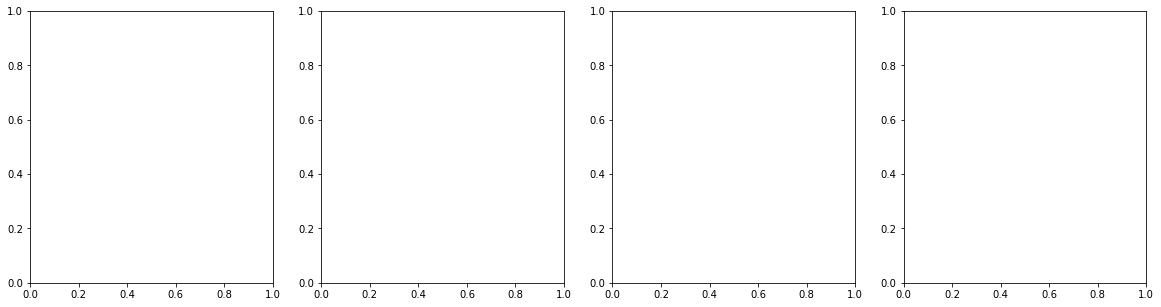

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))

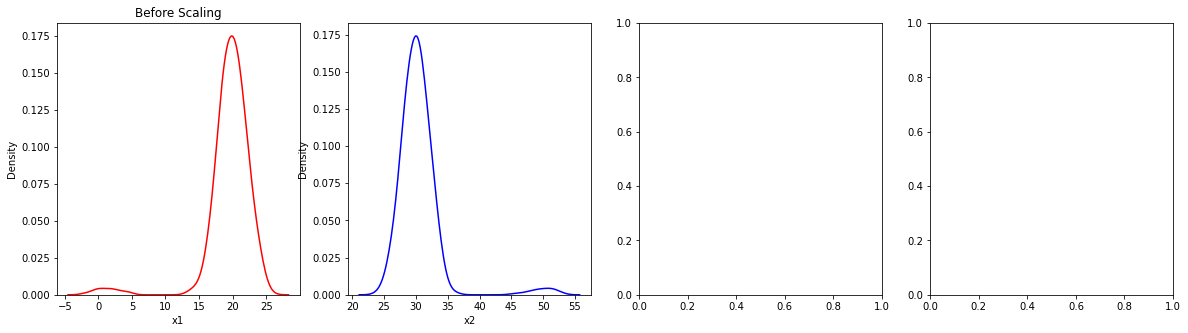

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x['x1'], ax=ax1, color='red')
sns.kdeplot(x['x2'], ax=ax2, color='blue')
plt.show()

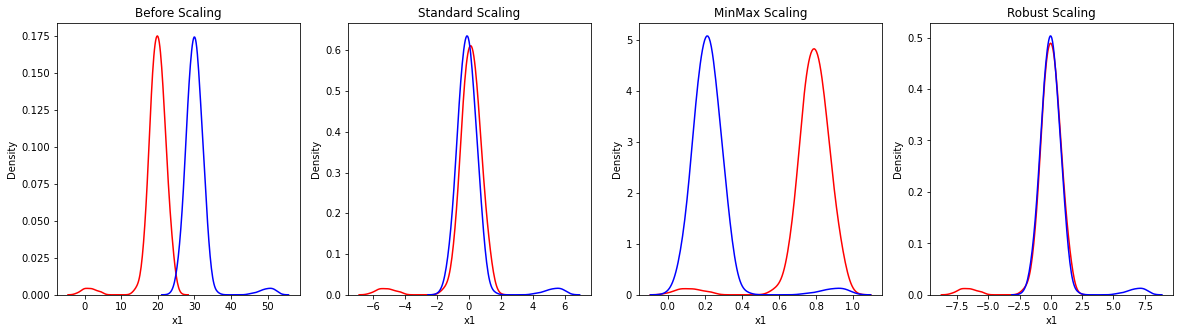

In [28]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x['x1'], ax=ax1, color='r')
sns.kdeplot(x['x2'], ax=ax1, color='b')

ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df['x1'], ax=ax2, color='r')
sns.kdeplot(standard_df['x2'], ax=ax2, color='b')

ax3.set_title("MinMax Scaling")
sns.kdeplot(MinMax_df['x1'], ax=ax3, color='r')
sns.kdeplot(MinMax_df['x2'], ax=ax3, color='b')

ax4.set_title("Robust Scaling")
sns.kdeplot(Robust_df['x1'], ax=ax4, color='r')
sns.kdeplot(Robust_df['x2'], ax=ax4, color='b')

plt.show()

In [29]:
from sklearn.datasets import load_iris
import pandas as pd

# StandardScaler
* sklearn.preprocessing.StandardScaler
* StandardScaler(*, copy=True, with_mean=True, with_std=True)

In [31]:
## p.108

## 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
## p.109
## StandardScaler 객체 생성
sscaler = StandardScaler()

## StandardScaler로 데이터 셋 변환. fit( )과 transform( )호출
sscaler.fit(iris_df)
iris_sscaled = sscaler.transform(iris_df)

## transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DAtaFrame으로 변환
iris_df_sscaled = pd.DataFrame(data = iris_sscaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


# MinMaxScaler
* sklearn.preprocessing.MinMaxScaler
* MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
## p.110
## MinMaxScaler 객체 생성
mscaler = MinMaxScaler()

## MinMaxScaler로 데이터 셋 변환. fit( )과 transform( )호출
mscaler.fit(iris_df)
iris_mscaled = mscaler.transform(iris_df)

## transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DAtaFrame으로 변환
iris_df_mscaled = pd.DataFrame(data = iris_mscaled, columns=iris.feature_names)
print('feature 들의 최소 값')
print(iris_df_mscaled.min())
print('\nfeature 들의 최대 값')
print(iris_df_mscaled.max())

feature 들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


# RobustScaler
* sklearn.preprocessing.RobustScaler
* RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)

In [44]:
from sklearn.preprocessing import RobustScaler

In [61]:
## RobustScaler 객체 생성
rscaler = RobustScaler()

## RobustScaler로 데이터 셋 변환. fit( )과 transform( )호출
rscaler.fit(iris_df)
iris_rscaled = rscaler.transform(iris_df)
iris_df_rscaled = pd.DataFrame(data=iris_rscaled, columns=iris.feature_names)
iris_df_rscaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


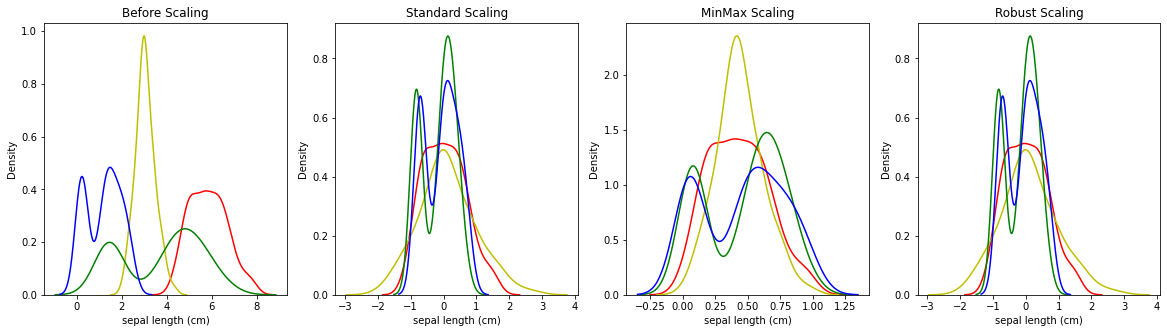

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(iris_df['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df['petal width (cm)'], ax = ax1, color = 'b')

ax2.set_title('Standard Scaling')
sns.kdeplot(iris_df_scaled['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(iris_df_scaled['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(iris_df_scaled['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(iris_df_scaled['petal width (cm)'], ax = ax2, color = 'b')

ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_mscaled['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(iris_df_mscaled['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(iris_df_mscaled['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(iris_df_mscaled['petal width (cm)'], ax = ax3, color = 'b')

ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_rscaled['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(iris_df_rscaled['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(iris_df_rscaled['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(iris_df_rscaled['petal width (cm)'], ax = ax4, color = 'b')
plt.show()

1. 데이터 리드
2. null값 제거
3. 피처와 레이블(서바이브드) 분리
4. 문자열 인코딩, 스케일링